In [3]:
import scipy as sp
data = sp.genfromtxt("Data/web_traffic.tsv",delimiter="\t")

C:\Users\HARSHIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  


In [5]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [3]:
#We have to specify tab as the delimiter so that the columns are correctly determined.
#A quick check shows that we have correctly read in the data.

In [6]:
print (data.shape)

(743, 2)


In [5]:
#Preoprocessing and Cleaning of Data

In [7]:
x = data[:,0]
y = data[:,1]

In [8]:
sp.sum(sp.isnan(y))

C:\Users\HARSHIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  """Entry point for launching an IPython kernel.
C:\Users\HARSHIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  """Entry point for launching an IPython kernel.


8

In [10]:
import numpy as np
x= x[~sp.isnan(y)]

C:\Users\HARSHIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  


In [12]:
y = y[~np.isnan(y)]

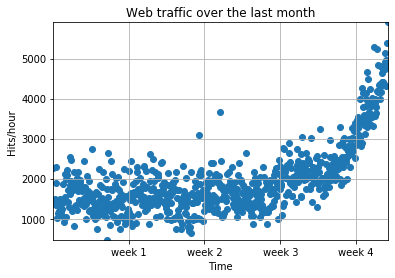

In [28]:
#To get a first impression of our data, let us plot the data in a scatter plot using 
#Matplotlib. Matplotlib contains the pyplot package, which tries to mimic Matlab's 
#interface—a very convenient and easy-to-use one
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], 
 ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [19]:
#When we talk about models, you can think of them as simplified theoretical 
#approximations of the complex reality. As such there is always some inferiority 
#involved, also called the approximation error. This error will guide us in choosing 
#the right model among the myriad of choices we have. This error will be calculated 
#as the squared distance of the model's prediction to the real data. That is, for a 
#learned model function, f, the error is calculated as follows:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)
#The vectors x and y contain the web stats data that we have extracted before. It is 
#the beauty of SciPy's vectorized functions that we exploit here with f(x). The 
#trained model is assumed to take a vector and return the results again as a vector 
#of the same size so that we can use it to calculate the difference to y

#Starting with a simple straight line
#Let us assume for a second that the underlying model is a straight line. The 
#challenge then is how to best put that line into the chart so that it results in the 
#smallest approximation error. SciPy's polyfit() function does exactly that. Given 
#data x and y and the desired order of the polynomial (straight line has order 1), 
#it finds the model function that minimizes the error function defined earlier.
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

C:\Users\HARSHIT\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead


In [20]:
#The polyfit() function returns the parameters of the fitted model function, 
#fp1; and by setting full to True, we also get additional background information 
#on the fitting process. Of it, only residuals are of interest, which is exactly the error 
#of the approximation
print("Model parameters: %s" % fp1)

Model parameters: [  2.59619213 989.02487106]


In [21]:
print(res)

NameError: name 'res' is not defined

In [17]:
print(res)

NameError: name 'res' is not defined

In [24]:
#This means that the best straight line fit is the following function:
#f(x) = 2.59619213 * x + 989.02487106

In [25]:
f1 = sp.poly1d(fp1)

In [26]:
print(error(f1, x, y))

317389767.339778


C:\Users\HARSHIT\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  


C:\Users\HARSHIT\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  This is separate from the ipykernel package so we can avoid doing imports until


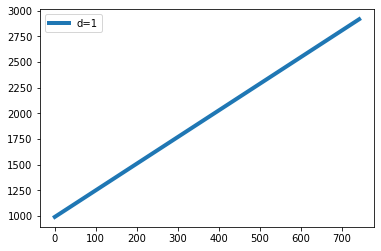

In [29]:
#We can now use f1() to plot our first trained model. In addition to the earlier 
#plotting instructions, we simply add the following:
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")